# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

In [188]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
data_50  = pd.read_csv('preprocessed_data.csv', nrows=50000)
data_20  = pd.read_csv('preprocessed_data.csv', nrows=20000)
pre_data  = pd.read_csv('preprocessed_data.csv')

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y_50 = data_50['project_is_approved'].values
X_50 = data_50.drop(['project_is_approved'], axis=1)

In [4]:
y_20 = data_20['project_is_approved'].values
X_20 = data_20.drop(['project_is_approved'], axis=1)

In [116]:
from sklearn.model_selection import train_test_split
X_train50, X_test50, y_train50, y_test50 = train_test_split(X_50, y_50, test_size=0.25, stratify=y_50)
X_train50, X_cv50, y_train50, y_cv50 = train_test_split(X_train50, y_train50, test_size=0.25, stratify=y_train50)

In [117]:
X_train20, X_test20, y_train20, y_test20 = train_test_split(X_20, y_20, test_size=0.25, stratify=y_20)
X_train20, X_cv20, y_train20, y_cv20 = train_test_split(X_train20, y_train20, test_size=0.25, stratify=y_train20)

In [120]:
X_train50.reset_index(drop=True,inplace=True)
X_test50.reset_index(drop=True,inplace=True)
X_cv50.reset_index(drop=True,inplace=True)
X_train20.reset_index(drop=True,inplace=True)
X_test20.reset_index(drop=True,inplace=True)
X_cv20.reset_index(drop=True,inplace=True)

In [308]:
print(X_train50.shape, y_train50.shape)
print(X_cv50.shape, y_cv50.shape)
print(X_test50.shape, y_test50.shape)

print("="*100)
print(X_train20.shape, y_train20.shape)
print(X_cv20.shape, y_cv20.shape)
print(X_test20.shape, y_test20.shape)

print("="*100)

(28125, 20) (28125,)
(9375, 20) (9375, 1)
(12500, 20) (12500, 1)
(11250, 20) (11250, 1)
(3750, 20) (3750, 1)
(5000, 20) (5000, 1)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [178]:
def Responsetable(dataset, col) :
    pos=[]
    neg=[]
    pos.append(dataset[dataset['project_is_approved']==0].groupby(col).size())
    neg.append(dataset[dataset['project_is_approved']==1].groupby(col).size())

    encoded_Pos = []
    for i in range(len(pos)) :
        encoded_Pos.append(pos[i]/(pos[i] + neg[i]))
    
    encoded_Neg = []
    encoded_Neg[:] = [1 - x for x in encoded_Pos]
        
    encoded_Pos_val = pd.DataFrame(dict(zip(col, encoded_Pos)))
    encoded_Neg_val = pd.DataFrame(dict(zip(col, encoded_Neg)))
    encoded_Pos_val.fillna(0.5,inplace=True)
    encoded_Neg_val.fillna(0.5,inplace=True)
    return encoded_Pos_val.T.squeeze(), encoded_Neg_val.T.squeeze()
    

In [189]:
x_train

Unnamed: 0  Unnamed: 0.1       id                        teacher_id  \
0           33722          9747  p198380  e79171f3c5932ab5a076e1a2ab58541d   
1            4346         77176  p142926  ffc2971ff07b201f8aac319323532094   
2           25965        132052  p195453  a7b87bdf50c4a2c7bbad6646d8a7052e   
3            2899         49193  p071683  e3ef38fc7f585c5c0360645e77a8d503   
4           12579         95353  p030830  db0f890ccae35b86a825260fe8bc5581   
...           ...           ...      ...                               ...   
28120       37761         89302  p222420  7cf3001be9e9bda5edaad471617ec0fe   
28121       45854        139043  p145108  25b2ee23737ec7eab230050619c14648   
28122       28891        134382  p058249  3afdd6c7059078a60f6082d6bd6c35a2   
28123        2828         82517  p119486  9f9fca2358474017f4667ca74fbbb319   
28124       32021        152347  p243471  496cff713312c99bedd89eed94f02325   

      teacher_prefix school_state project_submitted_datetime  \
0                mrs           mi        2016-11-27 22:55:08   
1                 mr           sd        2016-12-01 12:49:21   
2                mrs           ny        2017-04-27 13:34:38   
3                 ms           nc        2016-10-31 16:27:39   
4                mrs           ok        2016-10-04 21:36:58   
...              ...          ...                        ...   
28120            mrs           al        2016-05-23 14:01:13   
28121             ms           nc        2016-08-16 20:38:14   
28122             mr           mi        2017-03-09 13:20:42   
28123            mrs           nh        2017-02-16 13:20:17   
28124            mrs           oh        2017-01-21 11:00:08   

      project_grade_category                           project_title  \
0              grades_prek_2                 hands center activities   
1                 grades_3_5                              stand kids   
2                 grades_6_8    tools allow us learn making mistakes   
3                 grades_3_5                            dot dot dash   
4              grades_prek_2                hot stuff now we cooking   
...                      ...                                     ...   
28120             grades_3_5                    learning screen osmo   
28121          grades_prek_2                ms kim marvelous monkeys   
28122             grades_3_5  march is reading month reward motivate   
28123             grades_6_8        chromebooks global communication   
28124             grades_3_5   an innovative flexible learning space   

                                         project_essay_1  ... project_essay_3  \
0      In teaching Young Fives, my classroom is often...  ...             NaN   
1      We are unique blend of many wonderful students...  ...             NaN   
2      My students are some of the most curious, kind...  ...             NaN   
3      My elementary school is a title 1 school. Sixt...  ...             NaN   
4      Preschoolers learn best by DOING, and they lov...  ...             NaN   
...                                                  ...  ...             ...   
28120  I teach third grade at a Title I school in a r...  ...             NaN   
28121  My students come to school ready to learn. My ...  ...             NaN   
28122  I am lucky to teach at a small, rural school w...  ...             NaN   
28123  Night and day. That's how clear-cut the divide...  ...             NaN   
28124  4th grade is such a pivotal year! The students...  ...             NaN   

      project_essay_4                           project_resource_summary  \
0                 NaN  My students need hands on center/small group m...   
1                 NaN  My students need (5) standing desks to start s...   
2                 NaN  My students need the ability to erase a highli...   
3                 NaN  My students need Sphero to learn the  21st cen...   
4                 NaN  My students need more cooking equipment to acc...   
...    

In [203]:
a,b=Responsetable(x_train,'teacher_prefix')
a.T.squeeze()
a['dr']


0.5

In [206]:
def encode(data):
    pos_teacherprefix, neg_teacherprefix = Responsetable(data, 'teacher_prefix')
    pos_projgradecat, neg_projgradecat = Responsetable(data, 'project_grade_category')
    pos_cleancat, neg_cleancat = Responsetable(data,'clean_categories')
    pos_cleansubcat, neg_cleansubcat = Responsetable(data,'clean_subcategories')
    pos_schoolstate, neg_schoolstate = Responsetable(data, 'school_state')
    clean_cat_pos=[]
    clean_cat_neg=[]
    clean_subcat_pos=[]
    clean_subcat_neg=[]
    school_state_pos=[]
    school_state_neg=[]
    teacher_prefix_pos=[]
    teacher_prefix_neg=[]
    proj_grade_cat_pos=[]
    proj_grade_cat_neg=[]
    df = pd.DataFrame()
    for i in data['clean_categories']:
        clean_cat_pos.append(pos_cleancat[i])
    for i in data['clean_categories']:
        clean_cat_neg.append(neg_cleancat[i])
    for i in data['clean_subcategories']:
        clean_subcat_pos.append(pos_cleansubcat[i])
    for i in data['clean_subcategories']:
        clean_subcat_neg.append(neg_cleansubcat[i])
    for i in data['school_state']:
        school_state_pos.append(pos_schoolstate[i])
    for i in data['school_state']:
        school_state_neg.append(neg_schoolstate[i])
    for i in data['teacher_prefix']:
        teacher_prefix_pos.append(pos_teacherprefix[i])
    for i in data['teacher_prefix']:
        teacher_prefix_neg.append(neg_teacherprefix[i])
    for i in data['project_grade_category']:
        proj_grade_cat_pos.append(pos_projgradecat[i])
    for i in data['project_grade_category']:
        proj_grade_cat_neg.append(neg_projgradecat[i])

    df = pd.DataFrame(list(zip(clean_cat_pos, clean_cat_neg,clean_subcat_pos,clean_subcat_neg,school_state_pos,school_state_neg,teacher_prefix_pos,teacher_prefix_neg,proj_grade_cat_pos,proj_grade_cat_neg)), 
               columns =['clean_cat_pos', 'clean_cat_neg','clean_subcat_pos','clean_subcat_neg','school_state_pos','school_state_neg','teacher_prefix_pos','teacher_prefix_neg','proj_grade_cat_pos','proj_grade_cat_neg'])
    return df

In [139]:
Y_train50=pd.DataFrame(data=y_train50,index=X_train50.index)
Y_train50.shape

(28125, 1)

In [207]:
x_train=pd.concat([X_train50,Y_train50],axis=1)
#x_train_new=encode(x_train)
x_train.set_axis([*x_train.columns[:-1], 'project_is_approved'], axis=1, inplace=True)
x_train_new_50=encode(x_train)

In [208]:
y_test50=pd.DataFrame(data=y_test50,index=X_test50.index)
x_test=pd.concat((X_test50,y_test50),axis=1)
x_test=pd.DataFrame(x_test)
#x_train_new=encode(x_train)
x_test=x_test.set_axis([*x_test.columns[:-1], 'project_is_approved'], axis=1, inplace=False)
x_test_new_50=encode(x_test)

In [209]:
x_test_new_50

clean_cat_pos  clean_cat_neg  clean_subcat_pos  clean_subcat_neg  \
0           0.126582       0.873418          0.134752          0.865248   
1           0.178826       0.821174          0.187990          0.812010   
2           0.138533       0.861467          0.124638          0.875362   
3           0.136437       0.863563          0.170455          0.829545   
4           0.229665       0.770335          0.230769          0.769231   
...              ...            ...               ...               ...   
12495       0.146067       0.853933          0.104089          0.895911   
12496       0.143828       0.856172          0.135231          0.864769   
12497       0.122768       0.877232          0.094340          0.905660   
12498       0.136437       0.863563          0.170455          0.829545   
12499       0.122768       0.877232          0.182390          0.817610   

       school_state_pos  school_state_neg  teacher_prefix_pos  \
0              0.105263          0.894737            0.158751   
1              0.149051          0.850949            0.147010   
2              0.175781          0.824219            0.147010   
3              0.170103          0.829897            0.163176   
4              0.160338          0.839662            0.147010   
...                 ...               ...                 ...   
12495          0.112867          0.887133            0.147010   
12496          0.147636          0.852364            0.216730   
12497          0.105263          0.894737            0.158751   
12498          0.170103          0.829897            0.158751   
12499          0.176080          0.823920            0.147010   

       teacher_prefix_neg  proj_grade_cat_pos  proj_grade_cat_neg  
0                0.841249            0.141703            0.858297  
1                0.852990            0.160977            0.839023  
2                0.852990            0.141703            0.858297  
3                0.836824            0.160977            0.839023  
4                0.852990            0.160977            0.839023  
...                   ...                 ...                 ...  
12495            0.852990            0.141703            0.858297  
12496            0.783270            0.160977            0.839023  
12497            0.841249            0.141703            0.858297  
12498            0.841249            0.160977            0.839023  
12499            0.852990            0.141703            0.858297  

[12500 rows x 10 columns]

In [210]:
y_cv50=pd.DataFrame(data=y_cv50,index=X_cv50.index)
x_cv=pd.concat((X_cv50,y_cv50),axis=1)
x_cv=pd.DataFrame(x_cv)
#x_train_new=encode(x_train)
x_cv=x_cv.set_axis([*x_cv.columns[:-1], 'project_is_approved'], axis=1, inplace=False)
x_cv_new_50=encode(x_cv)

In [211]:
y_train20=pd.DataFrame(data=y_train20,index=X_train20.index)
x_train=pd.concat((X_train20,y_train20),axis=1)
x_train=pd.DataFrame(x_train)
#x_train_new=encode(x_train)
x_train=x_train.set_axis([*x_train.columns[:-1], 'project_is_approved'], axis=1, inplace=False)
x_train_new_20=encode(x_train)

y_test20=pd.DataFrame(data=y_test20,index=X_test20.index)
x_test=pd.concat((X_test20,y_test20),axis=1)
x_test=pd.DataFrame(x_test)
#x_train_new=encode(x_train)
x_test=x_test.set_axis([*x_test.columns[:-1], 'project_is_approved'], axis=1, inplace=False)
x_test_new_20=encode(x_test)

y_cv20=pd.DataFrame(data=y_cv20,index=X_cv20.index)
x_cv=pd.concat((X_cv20,y_cv20),axis=1)
x_cv=pd.DataFrame(x_cv)
#x_train_new=encode(x_train)
x_cv=x_cv.set_axis([*x_cv.columns[:-1], 'project_is_approved'], axis=1, inplace=False)
x_cv_new_20=encode(x_cv)

In [212]:

def merge(table, p, n) :
    lstPos = table[p].values.tolist()
    lstNeg = table[n].values.tolist()
    frame = pd.DataFrame(list(zip(lstNeg, lstPos)))
    
    return frame

In [213]:
X_train_clean_categories_50 = merge(x_train_new_50, 'clean_cat_pos', 'clean_cat_neg')
X_cv_clean_categories_50 = merge(x_cv_new_50, 'clean_cat_pos', 'clean_cat_neg')
X_test_clean_categories_50 = merge(x_test_new_50, 'clean_cat_pos', 'clean_cat_neg')

X_train_clean_categories_20 = merge(x_train_new_20, 'clean_cat_pos', 'clean_cat_neg')
X_cv_clean_categories_20 = merge(x_cv_new_20, 'clean_cat_pos', 'clean_cat_neg')
X_test_clean_categories_20 = merge(x_test_new_20, 'clean_cat_pos', 'clean_cat_neg')

In [214]:
X_train_clean_subcategories_50 = merge(x_train_new_50, 'clean_subcat_pos', 'clean_subcat_neg')
X_cv_clean_subcategories_50 = merge(x_cv_new_50, 'clean_subcat_pos', 'clean_subcat_neg')
X_test_clean_subcategories_50 = merge(x_test_new_50, 'clean_subcat_pos', 'clean_subcat_neg')

X_train_clean_subcategories_20 = merge(x_train_new_20, 'clean_subcat_pos', 'clean_subcat_neg')
X_cv_clean_subcategories_20 = merge(x_cv_new_20, 'clean_subcat_pos', 'clean_subcat_neg')
X_test_clean_subcategories_20 = merge(x_test_new_20, 'clean_subcat_pos', 'clean_subcat_neg')

In [215]:
X_train_project_grade_50 = merge(x_train_new_50, 'proj_grade_cat_pos', 'proj_grade_cat_neg')
X_cv_project_grade_50 = merge(x_cv_new_50, 'proj_grade_cat_pos', 'proj_grade_cat_neg')
X_test_project_grade_50 = merge(x_test_new_50, 'proj_grade_cat_pos', 'proj_grade_cat_neg')

X_train_project_grade_20 = merge(x_train_new_20, 'proj_grade_cat_pos', 'proj_grade_cat_neg')
X_cv_project_grade_20 = merge(x_cv_new_20, 'proj_grade_cat_pos', 'proj_grade_cat_neg')
X_test_project_grade_20 = merge(x_test_new_20, 'proj_grade_cat_pos', 'proj_grade_cat_neg')

In [216]:
X_train_teacher_prefix_50 = merge(x_train_new_50, 'teacher_prefix_pos', 'teacher_prefix_neg')
X_cv_teacher_prefix_50 = merge(x_cv_new_50, 'teacher_prefix_pos', 'teacher_prefix_neg')
X_test_teacher_prefix_50 = merge(x_test_new_50, 'teacher_prefix_pos', 'teacher_prefix_neg')

X_train_teacher_prefix_20 = merge(x_train_new_20, 'teacher_prefix_pos', 'teacher_prefix_neg')
X_cv_teacher_prefix_20 = merge(x_cv_new_20, 'teacher_prefix_pos', 'teacher_prefix_neg')
X_test_teacher_prefix_20 = merge(x_test_new_20, 'teacher_prefix_pos', 'teacher_prefix_neg')

In [217]:
X_train_school_state_50 = merge(x_train_new_50, 'school_state_pos', 'school_state_neg')
X_cv_school_state_50 = merge(x_cv_new_50, 'school_state_pos', 'school_state_neg')
X_test_school_state_50 = merge(x_test_new_50, 'school_state_pos', 'school_state_neg')

X_train_school_state_20 = merge(x_train_new_20, 'school_state_pos', 'school_state_neg')
X_cv_school_state_20 = merge(x_cv_new_20, 'school_state_pos', 'school_state_neg')
X_test_school_state_20 = merge(x_test_new_20, 'school_state_pos', 'school_state_neg')

In [218]:
X_test_teacher_prefix_50.shape

(12500, 2)

In [219]:
X_train_project_grade_50

0         1
0      0.847075  0.152925
1      0.851672  0.148328
2      0.839559  0.160441
3      0.851672  0.148328
4      0.847075  0.152925
...         ...       ...
28120  0.851672  0.148328
28121  0.847075  0.152925
28122  0.851672  0.148328
28123  0.839559  0.160441
28124  0.851672  0.148328

[28125 rows x 2 columns]

In [86]:
from sklearn.preprocessing import StandardScaler

vectorizer = StandardScaler()
vectorizer.fit(X_train50['price'].values.reshape(-1,1))

X_train_price_50 = vectorizer.transform(X_train50['price'].values.reshape(-1, 1))
X_cv_price_50 = vectorizer.transform(X_cv50['price'].values.reshape(-1, 1))
X_test_price_50 = vectorizer.transform(X_test50['price'].values.reshape(-1, 1))

print(X_train_price_50.shape, y_train50.shape)
print(X_cv_price_50.shape, y_cv50.shape)
print(X_test_price_50.shape, y_test50.shape)
print("="*100)

(28125, 1) (28125,)
(9375, 1) (9375, 1)
(12500, 1) (12500, 1)


In [87]:
vectorizer = StandardScaler()
vectorizer.fit(X_train20['price'].values.reshape(-1,1))

X_train_price_20 = vectorizer.transform(X_train20['price'].values.reshape(-1, 1))
X_cv_price_20 = vectorizer.transform(X_cv20['price'].values.reshape(-1, 1))
X_test_price_20 = vectorizer.transform(X_test20['price'].values.reshape(-1, 1))

print(X_train_price_20.shape, y_train20.shape)
print(X_cv_price_20.shape, y_cv20.shape)
print(X_test_price_20.shape, y_test20.shape)
print("="*100)

(11250, 1) (11250, 1)
(3750, 1) (3750, 1)
(5000, 1) (5000, 1)


In [88]:
vectorizer = StandardScaler()
vectorizer.fit(X_train50['quantity'].astype(float).values.reshape(-1,1))

X_train_quantity_50 = vectorizer.transform(X_train50['quantity'].astype(float).values.reshape(-1, 1))
X_cv_quantity_50 = vectorizer.transform(X_cv50['quantity'].astype(float).values.reshape(-1, 1))
X_test_quantity_50 = vectorizer.transform(X_test50['quantity'].astype(float).values.reshape(-1, 1))

print(X_train_quantity_50.shape, y_train50.shape)
print(X_cv_quantity_50.shape, y_cv50.shape)
print(X_test_quantity_50.shape, y_test50.shape)
print("="*100)

(28125, 1) (28125,)
(9375, 1) (9375, 1)
(12500, 1) (12500, 1)


In [89]:
vectorizer = StandardScaler()
vectorizer.fit(X_train20['quantity'].astype(float).values.reshape(-1,1))

X_train_quantity_20 = vectorizer.transform(X_train20['quantity'].astype(float).values.reshape(-1, 1))
X_cv_quantity_20 = vectorizer.transform(X_cv20['quantity'].astype(float).values.reshape(-1, 1))
X_test_quantity_20 = vectorizer.transform(X_test20['quantity'].astype(float).values.reshape(-1, 1))

print(X_train_quantity_20.shape, y_train20.shape)
print(X_cv_quantity_20.shape, y_cv20.shape)
print(X_test_quantity_20.shape, y_test20.shape)
print("="*100)

(11250, 1) (11250, 1)
(3750, 1) (3750, 1)
(5000, 1) (5000, 1)


In [90]:
vectorizer = StandardScaler()
vectorizer.fit(X_train50['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1,1))

X_train_prev_projects_50 = vectorizer.transform(X_train50['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))
X_cv_prev_projects_50 = vectorizer.transform(X_cv50['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))
X_test_prev_projects_50 = vectorizer.transform(X_test50['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))

print(X_train_prev_projects_50.shape, y_train50.shape)
print(X_cv_prev_projects_50.shape, y_cv50.shape)
print(X_test_prev_projects_50.shape, y_test50.shape)
print("="*100)

(28125, 1) (28125,)
(9375, 1) (9375, 1)
(12500, 1) (12500, 1)


In [91]:
vectorizer = StandardScaler()
vectorizer.fit(X_train20['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1,1))

X_train_prev_projects_20 = vectorizer.transform(X_train20['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))
X_cv_prev_projects_20 = vectorizer.transform(X_cv20['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))
X_test_prev_projects_20 = vectorizer.transform(X_test20['teacher_number_of_previously_posted_projects'].astype(float).values.reshape(-1, 1))

print(X_train_prev_projects_20.shape, y_train20.shape)
print(X_cv_prev_projects_20.shape, y_cv20.shape)
print(X_test_prev_projects_20.shape, y_test20.shape)
print("="*100)

(11250, 1) (11250, 1)
(3750, 1) (3750, 1)
(5000, 1) (5000, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [71]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train50['project_title'].values)

X_train_titles_bow_50 = vectorizer.transform(X_train50['project_title'].values)
X_cv_titles_bow_50 = vectorizer.transform(X_cv50['project_title'].values)
X_test_titles_bow_50 = vectorizer.transform(X_test50['project_title'].values)

print(X_train_titles_bow_50.shape, y_train50.shape)
print(X_cv_titles_bow_50.shape, y_cv50.shape)
print(X_test_titles_bow_50.shape, y_test50.shape)
print("="*100)

(28125, 2468) (28125,)
(9375, 2468) (9375, 1)
(12500, 2468) (12500, 1)


In [73]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train50['essay'].values)

X_train_essay_bow_50 = vectorizer.transform(X_train50['essay'].values)
X_cv_essay_bow_50 = vectorizer.transform(X_cv50['essay'].values)
X_test_essay_bow_50 = vectorizer.transform(X_test50['essay'].values)

print(X_train_essay_bow_50.shape, y_train50.shape)
print(X_cv_essay_bow_50.shape, y_cv50.shape)
print(X_test_essay_bow_50.shape, y_test50.shape)
print("="*100)

(28125, 91122) (28125,)
(9375, 91122) (9375, 1)
(12500, 91122) (12500, 1)


In [74]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train50['project_title'].values)

X_train_titles_tfidf_50 = vectorizer.transform(X_train50['project_title'].values)
X_cv_titles_tfidf_50 = vectorizer.transform(X_cv50['project_title'].values)
X_test_titles_tfidf_50 = vectorizer.transform(X_test50['project_title'].values)

print(X_train_titles_tfidf_50.shape, y_train50.shape)
print(X_cv_titles_tfidf_50.shape, y_cv50.shape)
print(X_test_titles_tfidf_50.shape, y_test50.shape)

(28125, 2468) (28125,)
(9375, 2468) (9375, 1)
(12500, 2468) (12500, 1)


In [76]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train50['essay'].values)

X_train_essay_tfidf_50 = vectorizer.transform(X_train50['essay'].values)
X_cv_essay_tfidf_50 = vectorizer.transform(X_cv50['essay'].values)
X_test_essay_tfidf_50 = vectorizer.transform(X_test50['essay'].values)

print(X_train_essay_tfidf_50.shape, y_train50.shape)
print(X_cv_essay_tfidf_50.shape, y_cv50.shape)
print(X_test_essay_tfidf_50.shape, y_test50.shape)
print("="*100)

(28125, 5000) (28125,)
(9375, 5000) (9375, 1)
(12500, 5000) (12500, 1)


In [77]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [78]:
X_train_titles_avgw2v = []
X_cv_titles_avgw2v = []
X_test_titles_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train20['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_titles_avgw2v.append(vector)

for sentence in tqdm(X_cv20['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_titles_avgw2v.append(vector)
    
for sentence in tqdm(X_test20['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_titles_avgw2v.append(vector)

print(len(X_train_titles_avgw2v))
print(len(X_train_titles_avgw2v[0]))
print(len(X_cv_titles_avgw2v))
print(len(X_cv_titles_avgw2v[0]))
print(len(X_test_titles_avgw2v))
print(len(X_test_titles_avgw2v[0]))

100%|███████████████████████████████████| 5000/5000 [00:00<00:00, 54945.01it/s]

11250
300
3750
300
5000
300


In [79]:
X_train_essay_avgw2v = []
X_cv_essay_avgw2v = []
X_test_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train20['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avgw2v.append(vector)

for sentence in tqdm(X_cv20['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avgw2v.append(vector)
    
for sentence in tqdm(X_test20['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avgw2v.append(vector)

print(len(X_train_essay_avgw2v))
print(len(X_train_essay_avgw2v[0]))
print(len(X_cv_essay_avgw2v))
print(len(X_cv_essay_avgw2v[0]))
print(len(X_test_essay_avgw2v))
print(len(X_test_essay_avgw2v[0]))

100%|████████████████████████████████████| 5000/5000 [00:01<00:00, 3649.63it/s]

11250
300
3750
300
5000
300


In [80]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4))
tfidf_model.fit(X_train20['project_title'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [81]:
X_train_titles_avgtf = []
X_cv_titles_avgtf = []
X_test_titles_avgtf = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train20['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_titles_avgtf.append(vector)
    
for sentence in tqdm(X_cv20['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_titles_avgtf.append(vector)
    
for sentence in tqdm(X_test20['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_titles_avgtf.append(vector)

print(len(X_train_titles_avgtf))
print(len(X_train_titles_avgtf[0]))
print(len(X_cv_titles_avgtf))
print(len(X_cv_titles_avgtf[0]))
print(len(X_test_titles_avgtf))
print(len(X_test_titles_avgtf[0]))

100%|███████████████████████████████████| 5000/5000 [00:00<00:00, 25510.19it/s]

11250
300
3750
300
5000
300


In [ ]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4))
tfidf_model.fit(X_train20['essay'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [83]:
X_train_essay_avgtf = []
X_cv_essay_avgtf = []
X_test_essay_avgtf = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train20['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_avgtf.append(vector)
    
for sentence in tqdm(X_cv20['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_essay_avgtf.append(vector)
    
for sentence in tqdm(X_test20['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_avgtf.append(vector)

print(len(X_train_essay_avgtf))
print(len(X_train_essay_avgtf[0]))
print(len(X_cv_essay_avgtf))
print(len(X_cv_essay_avgtf[0]))
print(len(X_test_essay_avgtf))
print(len(X_test_essay_avgtf[0]))

100%|█████████████████████████████████████| 5000/5000 [00:05<00:00, 912.74it/s]


11250
300
3750
300
5000
300


In [220]:
#BOW DATA MATRIX
from scipy.sparse import hstack
X_train_bow = hstack((X_train_essay_bow_50,X_train_titles_bow_50,X_train_clean_categories_50,X_train_clean_subcategories_50, X_train_school_state_50, X_train_teacher_prefix_50, X_train_project_grade_50, X_train_price_50 ,X_train_prev_projects_50,X_train_quantity_50)).tocsr()
X_cv_bow = hstack((X_cv_essay_bow_50,X_cv_titles_bow_50,X_cv_clean_categories_50 ,X_cv_clean_subcategories_50 , X_cv_school_state_50 , X_cv_teacher_prefix_50  , X_cv_project_grade_50 , X_cv_price_50 ,X_cv_prev_projects_50 ,X_cv_quantity_50 )).tocsr()
X_test_bow = hstack((X_test_essay_bow_50,X_test_titles_bow_50,X_test_clean_categories_50 ,X_test_clean_subcategories_50 , X_test_school_state_50 , X_test_teacher_prefix_50 , X_test_project_grade_50 , X_test_price_50 ,X_test_prev_projects_50 ,X_test_quantity_50 )).tocsr()

In [221]:
#TFIDF DATA MATRIX

X_train_tfidf = hstack((X_train_essay_tfidf_50,X_train_titles_tfidf_50,X_train_clean_categories_50,X_train_clean_subcategories_50, X_train_school_state_50, X_train_teacher_prefix_50, X_train_project_grade_50, X_train_price_50 ,X_train_prev_projects_50,X_train_quantity_50)).tocsr()
X_cv_tfidf = hstack((X_cv_essay_tfidf_50,X_cv_titles_tfidf_50,X_cv_clean_categories_50 ,X_cv_clean_subcategories_50 , X_cv_school_state_50 , X_cv_teacher_prefix_50  , X_cv_project_grade_50 , X_cv_price_50 ,X_cv_prev_projects_50 ,X_cv_quantity_50 )).tocsr()
X_test_tfidf = hstack((X_test_essay_tfidf_50,X_test_titles_tfidf_50,X_test_clean_categories_50 ,X_test_clean_subcategories_50 , X_test_school_state_50 , X_test_teacher_prefix_50 , X_test_project_grade_50 , X_test_price_50 ,X_test_prev_projects_50 ,X_test_quantity_50 )).tocsr()

In [222]:
#AVG W2V DATA MATRIX

X_train_avgw2v = hstack((X_train_essay_avgw2v,X_train_titles_avgw2v,X_train_clean_categories_20,X_train_clean_subcategories_20, X_train_school_state_20, X_train_teacher_prefix_20, X_train_project_grade_20, X_train_price_20 ,X_train_prev_projects_20,X_train_quantity_20)).tocsr()
X_cv_avgw2v = hstack((X_cv_essay_avgw2v  ,X_cv_titles_avgw2v  ,X_cv_clean_categories_20 ,X_cv_clean_subcategories_20 , X_cv_school_state_20 , X_cv_teacher_prefix_20  , X_cv_project_grade_20 , X_cv_price_20 ,X_cv_prev_projects_20 ,X_cv_quantity_20 )).tocsr()
X_test_avgw2v = hstack((X_test_essay_avgw2v  ,X_test_titles_avgw2v  ,X_test_clean_categories_20 ,X_test_clean_subcategories_20 , X_test_school_state_20 , X_test_teacher_prefix_20 , X_test_project_grade_20 , X_test_price_20 ,X_test_prev_projects_20 ,X_test_quantity_20 )).tocsr()

In [223]:
#TFIDF AVG W2V DATA MATRIX

X_train_avgtf = hstack((X_train_essay_avgtf,X_train_titles_avgtf,X_train_clean_categories_20,X_train_clean_subcategories_20, X_train_school_state_20, X_train_teacher_prefix_20, X_train_project_grade_20, X_train_price_20 ,X_train_prev_projects_20,X_train_quantity_20)).tocsr()
X_cv_avgtf = hstack((X_cv_essay_avgtf   ,X_cv_titles_avgtf   ,X_cv_clean_categories_20 ,X_cv_clean_subcategories_20 , X_cv_school_state_20 , X_cv_teacher_prefix_20  , X_cv_project_grade_20 , X_cv_price_20 ,X_cv_prev_projects_20 ,X_cv_quantity_20 )).tocsr()
X_test_avgtf = hstack((X_test_essay_avgtf   ,X_test_titles_avgtf   ,X_test_clean_categories_20 ,X_test_clean_subcategories_20 , X_test_school_state_20 , X_test_teacher_prefix_20 , X_test_project_grade_20 , X_test_price_20 ,X_test_prev_projects_20 ,X_test_quantity_20 )).tocsr()

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [224]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [229]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import roc_auc_score

n_estimators= [10, 50, 100, 150, 200, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        rf = RandomForestClassifier(class_weight='balanced',n_estimators=i, max_depth=j)
        rf.fit(X_train_bow, y_train50)

        y_train_pred = batch_predict(rf, X_train_bow)    
        y_cv_pred = batch_predict(rf, X_cv_bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train50,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv50, y_cv_pred))





  0%|                                                    | 0/7 [00:00<?, ?it/s]

 14%|██████▎                                     | 1/7 [00:05<00:32,  5.45s/it]

 29%|████████████▌                               | 2/7 [00:23<00:45,  9.17s/it]

 43%|██████████████████▊                         | 3/7 [00:56<01:05, 16.43s/it]

 57%|█████████████████████████▏                  | 4/7 [01:49<01:22, 27.48s/it]

 71%|███████████████████████████████▍            | 5/7 [02:57<01:19, 39.64s/it]

 86%|█████████████████████████████████████▋      | 6/7 [05:42<01:17, 77.22s/it]

100%|████████████████████████████████████████████| 7/7 [10:52<00:00, 93.16s/it]


In [252]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)
print(n_estimators_list)
print(max_depth_list)

[10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[2, 3, 4, 5, 6, 8, 10, 2, 3, 4, 5, 6, 8, 10, 2, 3, 4, 5, 6, 8, 10, 2, 3, 4, 5, 6, 8, 10, 2, 3, 4, 5, 6, 8, 10, 2, 3, 4, 5, 6, 8, 10, 2, 3, 4, 5, 6, 8, 10]


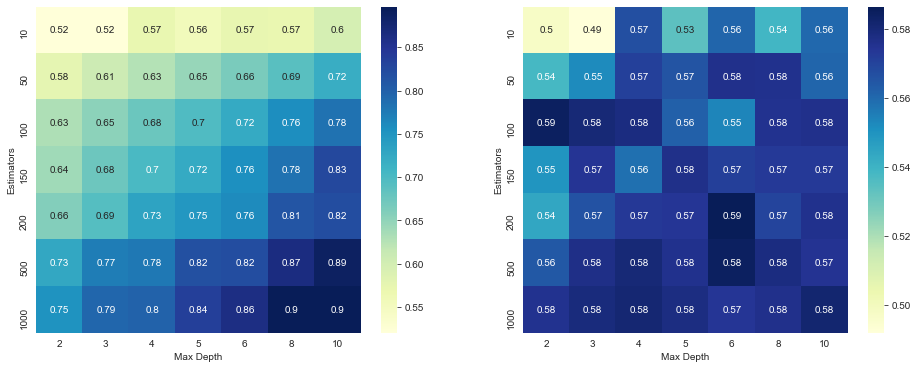

In [254]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

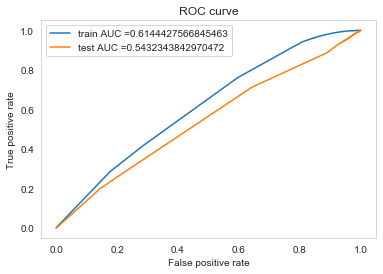

In [255]:
best_n_estimator=100
best_max_depth=2

rf = RandomForestClassifier(class_weight='balanced',n_estimators=best_n_estimator, max_depth=best_max_depth)
rf.fit(X_train_bow, y_train50)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rf, X_train_bow)    
y_test_pred = batch_predict(rf, X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train50, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test50, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [257]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [259]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train50, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test50, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.30818006740491094 for threshold 0.846
Train confusion matrix
[[ 2975  1365]
 [ 9894 13891]]
Test confusion matrix
[[ 697 1231]
 [3098 7474]]


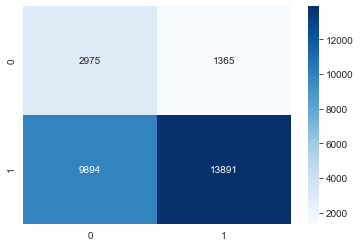

In [260]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train50, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

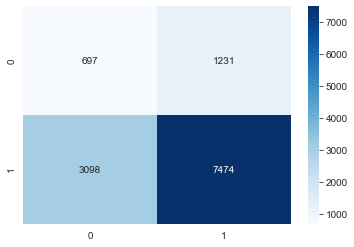

In [261]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test50, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [262]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import roc_auc_score

n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        rf = RandomForestClassifier(class_weight='balanced',n_estimators=i, max_depth=j)
        rf.fit(X_train_tfidf, y_train50)

        y_train_pred = batch_predict(rf, X_train_tfidf)    
        y_cv_pred = batch_predict(rf, X_cv_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train50,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv50, y_cv_pred))




  0%|                                                    | 0/8 [00:00<?, ?it/s]


 12%|█████▌                                      | 1/8 [00:04<00:30,  4.40s/it]


 25%|███████████                                 | 2/8 [00:20<00:47,  7.91s/it]


 38%|████████████████▌                           | 3/8 [00:50<01:13, 14.63s/it]


 50%|██████████████████████                      | 4/8 [01:35<01:34, 23.66s/it]


 62%|███████████████████████████▌                | 5/8 [02:35<01:43, 34.43s/it]


 75%|█████████████████████████████████           | 6/8 [04:03<01:41, 50.69s/it]


 88%|██████████████████████████████████████▌     | 7/8 [06:29<01:19, 79.24s/it]


100%|████████████████████████████████████████████| 8/8 [11:20<00:00, 85.02s/it]


In [263]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)
print(n_estimators_list)
print(max_depth_list)

[10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10]


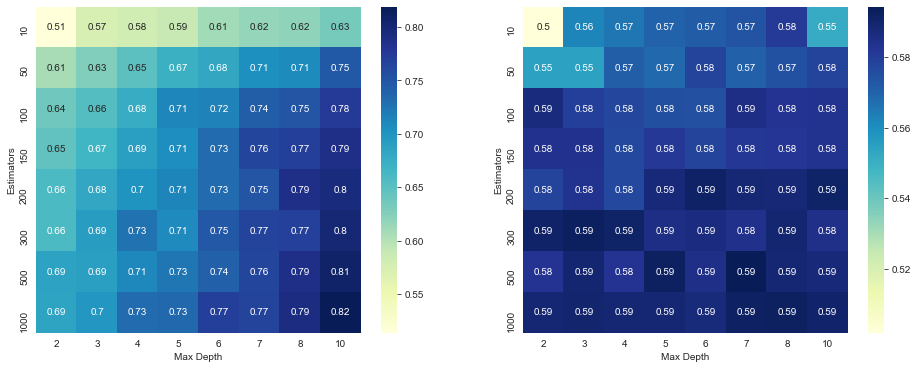

In [264]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

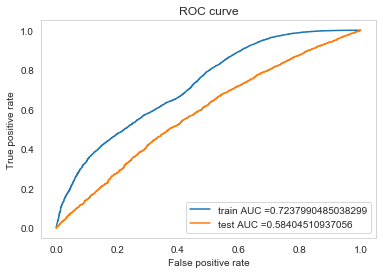

In [272]:
best_n_estimator=300
best_max_depth=5

rf = RandomForestClassifier(n_estimators=best_n_estimator, max_depth=best_max_depth)
rf.fit(X_train_tfidf, y_train50)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rf, X_train_tfidf)    
y_test_pred = batch_predict(rf, X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train50, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test50, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [273]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train50, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test50, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.40648044259781124 for threshold 0.846
Train confusion matrix
[[ 3076  1264]
 [10144 13641]]
Test confusion matrix
[[1006  922]
 [4232 6340]]


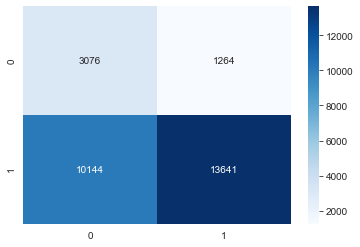

In [274]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train50, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

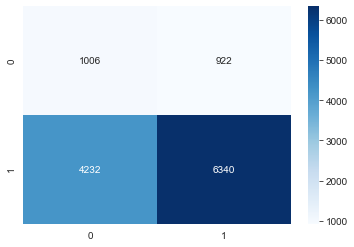

In [275]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test50, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [277]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]


n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        rf = RandomForestClassifier(class_weight='balanced',n_estimators=i, max_depth=j)
        rf.fit(X_train_avgw2v, y_train20)

        y_train_pred = batch_predict(rf, X_train_avgw2v)    
        y_cv_pred = batch_predict(rf, X_cv_avgw2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train20,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv20, y_cv_pred))




  0%|                                                    | 0/8 [00:00<?, ?it/s]


 12%|█████▌                                      | 1/8 [00:13<01:32, 13.15s/it]


 25%|███████████                                 | 2/8 [01:08<02:34, 25.80s/it]


 38%|████████████████▌                           | 3/8 [02:57<04:13, 50.68s/it]


 50%|██████████████████████                      | 4/8 [05:36<05:33, 83.29s/it]


 62%|██████████████████████████▉                | 5/8 [09:07<06:04, 121.57s/it]


 75%|████████████████████████████████▎          | 6/8 [14:21<05:58, 179.27s/it]


 88%|█████████████████████████████████████▋     | 7/8 [23:03<04:42, 282.03s/it]


100%|███████████████████████████████████████████| 8/8 [40:37<00:00, 304.69s/it]


In [278]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)


Text(0.5, 1, 'CV AUC')

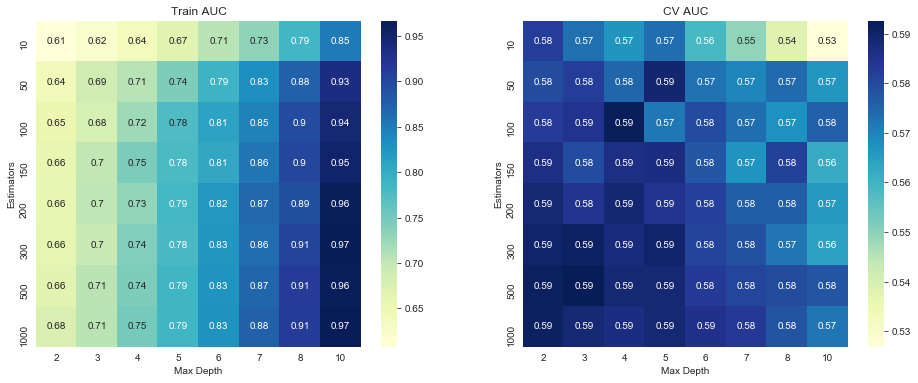

In [279]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title("Train AUC")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title("CV AUC")

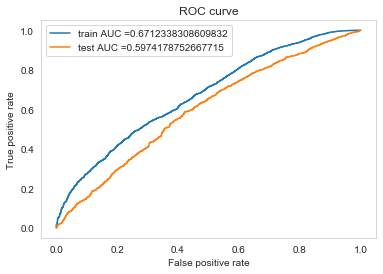

In [280]:
best_n_estimator=1000
best_max_depth=2

rf = RandomForestClassifier(class_weight='balanced',n_estimators=best_n_estimator, max_depth=best_max_depth)
rf.fit(X_train_avgw2v, y_train20)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rf, X_train_avgw2v)    
y_test_pred = batch_predict(rf, X_test_avgw2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train20, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test20, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [281]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train20, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test20, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.37237735456756677 for threshold 0.849
Train confusion matrix
[[1187  528]
 [4405 5130]]
Test confusion matrix
[[ 496  266]
 [2192 2046]]


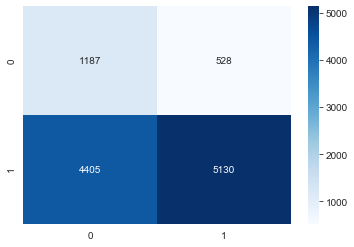

In [282]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train20, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

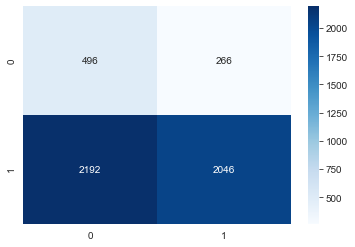

In [283]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test20, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [284]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]


n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        rf = RandomForestClassifier(class_weight='balanced',n_estimators=i, max_depth=j)
        rf.fit(X_train_avgtf, y_train20)

        y_train_pred = batch_predict(rf, X_train_avgtf)    
        y_cv_pred = batch_predict(rf, X_cv_avgtf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train20,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv20, y_cv_pred))




  0%|                                                    | 0/8 [00:00<?, ?it/s]


 12%|█████▌                                      | 1/8 [00:14<01:38, 14.04s/it]


 25%|███████████                                 | 2/8 [01:14<02:47, 27.95s/it]


 38%|████████████████▌                           | 3/8 [03:12<04:35, 55.05s/it]


 50%|██████████████████████                      | 4/8 [06:08<06:05, 91.35s/it]


 62%|██████████████████████████▉                | 5/8 [10:03<06:43, 134.38s/it]


 75%|████████████████████████████████▎          | 6/8 [15:54<06:38, 199.40s/it]


 88%|█████████████████████████████████████▋     | 7/8 [25:37<05:14, 314.42s/it]


100%|███████████████████████████████████████████| 8/8 [45:01<00:00, 337.63s/it]


In [285]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)


Text(0.5, 1, 'CV AUC')

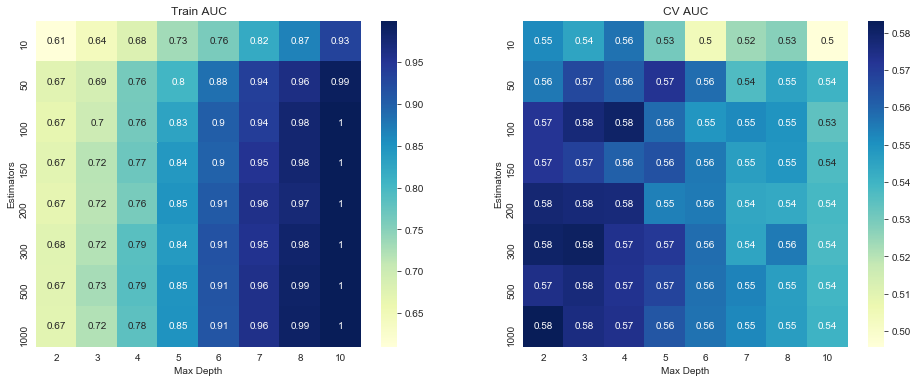

In [286]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title("Train AUC")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title("CV AUC")

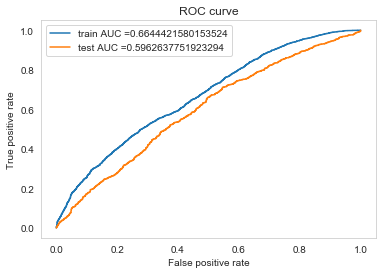

In [287]:
best_n_estimator=1000
best_max_depth=2

rf = RandomForestClassifier(n_estimators=best_n_estimator, max_depth=best_max_depth)
rf.fit(X_train_avgtf, y_train20)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rf, X_train_avgtf)    
y_test_pred = batch_predict(rf, X_test_avgtf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train20, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test20, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [288]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train20, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test20, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3677709711497154 for threshold 0.849
Train confusion matrix
[[1136  579]
 [4241 5294]]
Test confusion matrix
[[ 488  274]
 [2138 2100]]


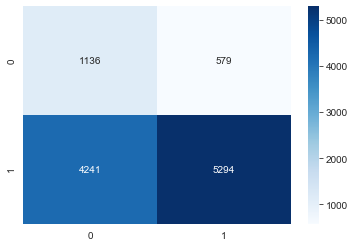

In [289]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train20, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

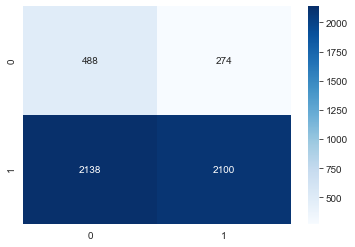

In [290]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test20, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [292]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]

from sklearn.ensemble  import GradientBoostingClassifier

n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        gbdt = GradientBoostingClassifier(n_estimators=i, max_depth=j)
        gbdt.fit(X_train_bow, y_train50)

        y_train_pred = batch_predict(gbdt, X_train_bow)    
        y_cv_pred = batch_predict(gbdt, X_cv_bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train50,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv50, y_cv_pred))




  0%|                                                    | 0/8 [00:00<?, ?it/s]


 12%|█████▍                                     | 1/8 [02:42<18:58, 162.67s/it]


 25%|██████████▊                                | 2/8 [11:54<27:55, 279.28s/it]


 38%|████████████████▏                          | 3/8 [28:03<40:32, 486.43s/it]


 50%|█████████████████████▌                     | 4/8 [51:20<50:38, 759.57s/it]


 62%|█████████████████████████               | 5/8 [1:21:26<53:40, 1073.52s/it]


 75%|██████████████████████████████          | 6/8 [2:05:23<51:24, 1542.34s/it]


 88%|███████████████████████████████████     | 7/8 [3:17:19<39:34, 2374.52s/it]


100%|████████████████████████████████████████| 8/8 [6:04:40<00:00, 2735.04s/it]


In [293]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)
print(n_estimators_list)
print(max_depth_list)

[10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10]


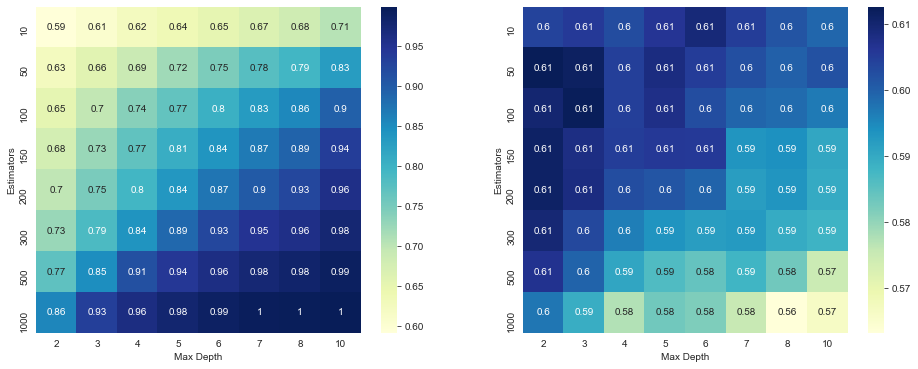

In [294]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

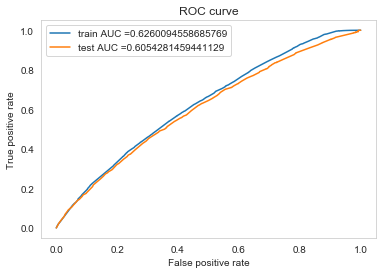

In [295]:
best_n_estimator=50
best_max_depth=2

gbdt = GradientBoostingClassifier(n_estimators=best_n_estimator, max_depth=best_max_depth)
gbdt.fit(X_train_bow, y_train50)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(gbdt, X_train_bow)    
y_test_pred = batch_predict(gbdt, X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train50, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test50, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [296]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train50, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test50, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.34303180663179855 for threshold 0.843
Train confusion matrix
[[ 2553  1787]
 [ 9915 13870]]
Test confusion matrix
[[1105  823]
 [4532 6040]]


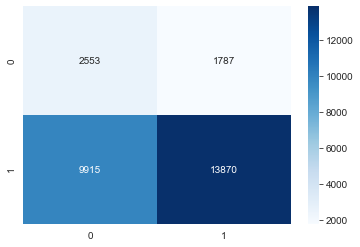

In [297]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train50, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

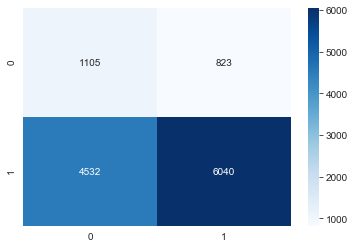

In [298]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test50, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [299]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]

from sklearn.ensemble  import GradientBoostingClassifier

n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        gbdt = GradientBoostingClassifier(n_estimators=i, max_depth=j)
        gbdt.fit(X_train_tfidf, y_train50)

        y_train_pred = batch_predict(gbdt, X_train_tfidf)    
        y_cv_pred = batch_predict(gbdt, X_cv_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train50,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv50, y_cv_pred))




  0%|                                                    | 0/8 [00:00<?, ?it/s]


 12%|█████▍                                     | 1/8 [03:24<23:51, 204.54s/it]


 25%|██████████▊                                | 2/8 [18:05<40:44, 407.35s/it]


 38%|███████████████▍                         | 3/8 [46:58<1:07:05, 805.14s/it]


 50%|███████████████████                   | 4/8 [1:29:57<1:29:09, 1337.45s/it]


 62%|███████████████████████▊              | 5/8 [2:26:52<1:38:02, 1960.72s/it]


 75%|████████████████████████████▌         | 6/8 [3:52:02<1:36:50, 2905.23s/it]


 88%|█████████████████████████████████▎    | 7/8 [6:13:51<1:16:26, 4586.57s/it]


100%|███████████████████████████████████████| 8/8 [10:57:38<00:00, 4932.36s/it]


In [300]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)
print(n_estimators_list)
print(max_depth_list)

[10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10]


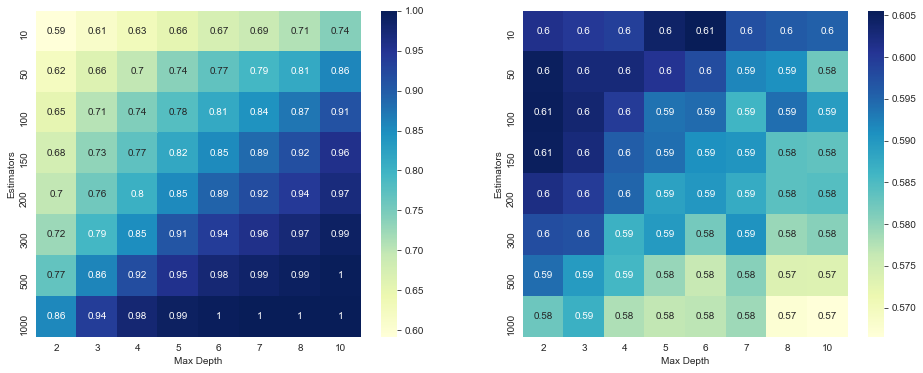

In [301]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

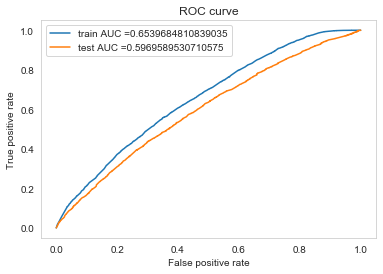

In [302]:
best_n_estimator=100
best_max_depth=2

gbdt = GradientBoostingClassifier(n_estimators=best_n_estimator, max_depth=best_max_depth)
gbdt.fit(X_train_tfidf, y_train50)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(gbdt, X_train_tfidf)    
y_test_pred = batch_predict(gbdt, X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train50, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test50, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [303]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train50, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test50, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3645088731716248 for threshold 0.843
Train confusion matrix
[[ 2611  1729]
 [ 9374 14411]]
Test confusion matrix
[[1051  877]
 [4334 6238]]


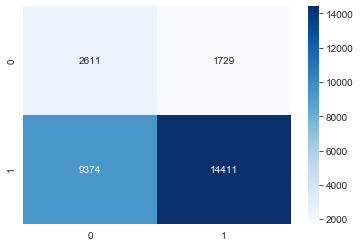

In [304]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train50, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

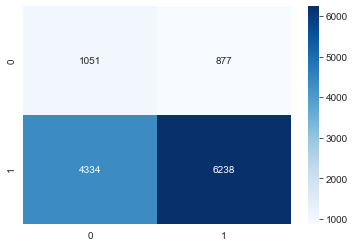

In [305]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test50, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [309]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]

from sklearn.ensemble  import GradientBoostingClassifier

n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        gbdt = GradientBoostingClassifier(n_estimators=i, max_depth=j)
        gbdt.fit(X_train_avgw2v, y_train20)

        y_train_pred = batch_predict(gbdt, X_train_avgw2v)    
        y_cv_pred = batch_predict(gbdt, X_cv_avgw2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train20,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv20, y_cv_pred))





  0%|                                                    | 0/8 [00:00<?, ?it/s]



 12%|█████▍                                     | 1/8 [05:46<40:22, 346.09s/it]



 25%|██████████▎                              | 2/8 [33:34<1:14:16, 742.73s/it]



 38%|██████████████▎                       | 3/8 [1:28:47<2:06:09, 1513.83s/it]



 50%|███████████████████                   | 4/8 [2:52:28<2:51:03, 2565.93s/it]



 62%|███████████████████████▊              | 5/8 [4:42:35<3:08:55, 3778.41s/it]



 75%|████████████████████████████▌         | 6/8 [7:26:34<3:06:33, 5596.59s/it]



 88%|████████████████████████████████▍    | 7/8 [11:57:25<2:26:32, 8792.83s/it]



100%|███████████████████████████████████████| 8/8 [20:19:24<00:00, 9145.52s/it]


In [263]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)
print(n_estimators_list)
print(max_depth_list)

[10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10]


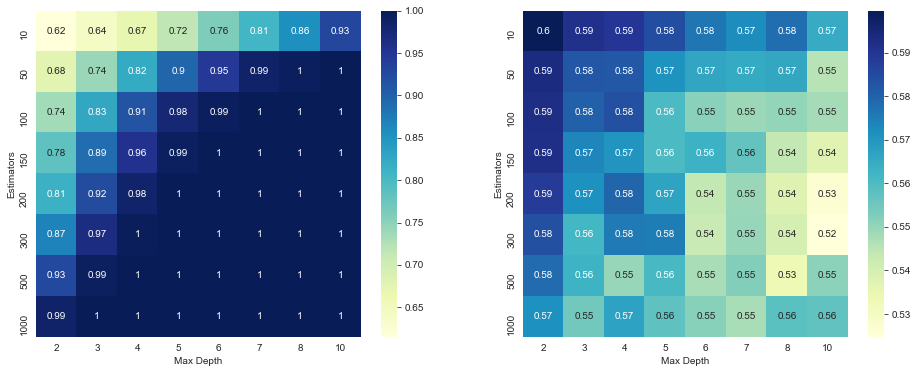

In [310]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

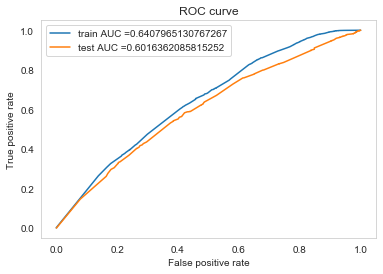

In [311]:
best_n_estimator=10
best_max_depth=3

gbdt = GradientBoostingClassifier(n_estimators=best_n_estimator, max_depth=best_max_depth)
gbdt.fit(X_train_avgw2v, y_train20)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(gbdt, X_train_avgw2v)    
y_test_pred = batch_predict(gbdt, X_test_avgw2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train20, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test20, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [312]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train20, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test20, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3579875279200001 for threshold 0.85
Train confusion matrix
[[1000  715]
 [3681 5854]]
Test confusion matrix
[[ 469  293]
 [1944 2294]]


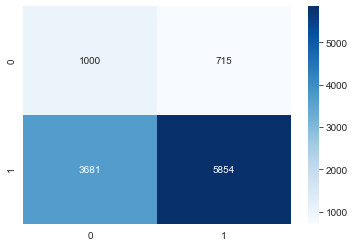

In [313]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train20, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

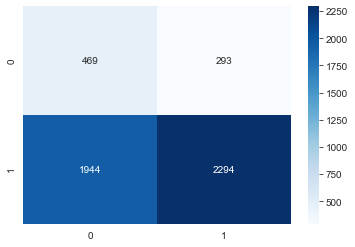

In [314]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test20, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [315]:
# Please write all the code with proper documentation
train_auc=[]
cv_auc=[]

from sklearn.ensemble  import GradientBoostingClassifier

n_estimators= [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 10]
for i in tqdm(n_estimators):
    for j in max_depth:
        gbdt = GradientBoostingClassifier(n_estimators=i, max_depth=j)
        gbdt.fit(X_train_avgtf, y_train20)

        y_train_pred = batch_predict(gbdt, X_train_avgtf)    
        y_cv_pred = batch_predict(gbdt, X_cv_avgtf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train20,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv20, y_cv_pred))





  0%|                                                    | 0/8 [00:00<?, ?it/s]



 12%|█████▍                                     | 1/8 [05:45<40:21, 345.93s/it]



 25%|██████████▎                              | 2/8 [33:17<1:13:46, 737.67s/it]



 38%|██████████████▎                       | 3/8 [1:28:58<2:06:32, 1518.57s/it]



 50%|███████████████████                   | 4/8 [2:52:04<2:50:36, 2559.00s/it]



 62%|███████████████████████▊              | 5/8 [4:43:11<3:09:33, 3791.15s/it]



 75%|████████████████████████████▌         | 6/8 [7:28:08<3:07:26, 5623.10s/it]



 88%|████████████████████████████████▍    | 7/8 [11:57:59<2:26:33, 8793.29s/it]



100%|███████████████████████████████████████| 8/8 [19:33:33<00:00, 8801.63s/it]


In [316]:
n_estimators_list=[]
max_depth_list=[]
for i in n_estimators:
    for j in max_depth:
        n_estimators_list.append(i)
        max_depth_list.append(j)
print(n_estimators_list)
print(max_depth_list)

[10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10, 2, 3, 4, 5, 6, 7, 8, 10]


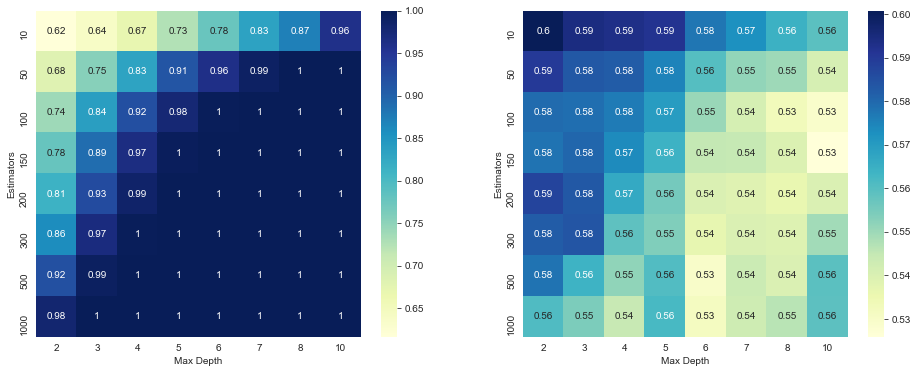

In [317]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(train_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':n_estimators_list, 'Max Depth':max_depth_list,'AUC':list(cv_auc)})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu")

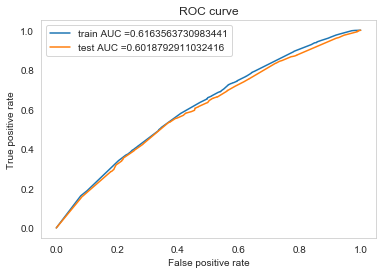

In [318]:
best_n_estimator=10
best_max_depth=2

gbdt = GradientBoostingClassifier(n_estimators=best_n_estimator, max_depth=best_max_depth)
gbdt.fit(X_train_avgtf, y_train20)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(gbdt, X_train_avgtf)    
y_test_pred = batch_predict(gbdt, X_test_avgtf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train20, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test20, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [319]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train20, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test20, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3426528930547423 for threshold 0.848
Train confusion matrix
[[1016  699]
 [4020 5515]]
Test confusion matrix
[[ 466  296]
 [1904 2334]]


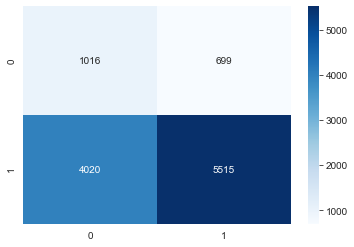

In [320]:
conf_matr_train = pd.DataFrame(confusion_matrix(y_train20, predict_with_best_t(y_train_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_train, annot=True, fmt='', cmap='Blues')

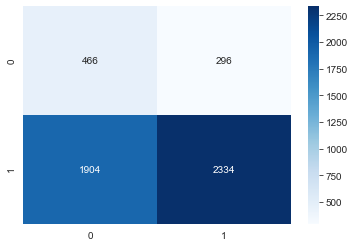

In [321]:
conf_matr_test = pd.DataFrame(confusion_matrix(y_test20, predict_with_best_t(y_test_pred,best_t)), range(2),range(2))
sns.heatmap(conf_matr_test, annot=True, fmt='', cmap='Blues')

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [322]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Vectorizer", "n_estimators", "max_depth", "Train AUC","Test AUC"]

x.add_row(["RF","BOW", 100,2,0.61, 0.54])
x.add_row(["RF","TFIDF", 300,5,0.72, 0.58])
x.add_row(["RF","AVGW2V", 1000 ,2 ,0.67, 0.59])
x.add_row(["RF","TFIDF W2V", 1000,2,0.66, 0.59])
x.add_row(["GBDT","BOW", 50,2,0.62, 0.60])
x.add_row(["GBDT","TFIDF", 100,2,0.65, 0.59])
x.add_row(["GBDT","AVGW2V", 10,3,0.64, 0.60])
x.add_row(["GBDT","TFIDF W2V", 10,2,0.61, 0.60])
print (x)

+-------+------------+--------------+-----------+-----------+----------+
| Model | Vectorizer | n_estimators | max_depth | Train AUC | Test AUC |
+-------+------------+--------------+-----------+-----------+----------+
|   RF  |    BOW     |     100      |     2     |    0.61   |   0.54   |
|   RF  |   TFIDF    |     300      |     5     |    0.72   |   0.58   |
|   RF  |   AVGW2V   |     1000     |     2     |    0.67   |   0.59   |
|   RF  | TFIDF W2V  |     1000     |     2     |    0.66   |   0.59   |
|  GBDT |    BOW     |      50      |     2     |    0.62   |   0.6    |
|  GBDT |   TFIDF    |     100      |     2     |    0.65   |   0.59   |
|  GBDT |   AVGW2V   |      10      |     3     |    0.64   |   0.6    |
|  GBDT | TFIDF W2V  |      10      |     2     |    0.61   |   0.6    |
+-------+------------+--------------+-----------+-----------+----------+


GBDT models give better results than RF.